In [34]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import mne
import scipy.sparse as sp
import random

random_seed = 1
random.seed(random_seed)
np.random.seed(random_seed)

In [35]:
def normalize_adj(adj):
    """Symmetrically normalize adjacency matrix."""
    adj = sp.coo_matrix(adj)
    rowsum = np.array(adj.sum(1))
    d_inv_sqrt = np.power(rowsum, -0.5).flatten()
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
    return sp.csr_matrix.todense(adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt))

In [36]:
X = pd.read_csv("./dataset/physionet.org_csv/S001/S001R01.csv")
ch_names = X.columns[2:]
X = X.iloc[0, 2:]

In [37]:
print(ch_names)
print(len(ch_names))

Index(['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..',
       'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.',
       'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.',
       'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..',
       'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.',
       'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..',
       'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..',
       'Iz..'],
      dtype='object')
64


# N-Graph

In [38]:
def n_graph():
    '''
        channel seq: Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,Cp1.,Cpz.,Cp2.,Cp4.,Cp6.,Fp1.,Fpz.,Fp2.,Af7.,Af3.,Afz.,Af4.,Af8.,F7..,F5..,F3..,F1..,Fz..,F2..,F4..,F6..,F8..,Ft7.,Ft8.,T7..,T8..,T9..,T10.,Tp7.,Tp8.,P7..,P5..,P3..,P1..,Pz..,P2..,P4..,P6..,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
                    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63
        '''
    neighbor_link = [(1, 2), (1,31),(1,39),(1,8),(1,30),(1,32),(1,9),(1,41),
                    (2, 3), (2,32),(2,9),(2,31),(2,33),(2,10),(2,8),
                    (3, 4), (3,33),(3,10),(3,32),(3,34),(3,11),(3,9),
                    (4, 5), (4,34),(4,11),(4,33),(4,45),(4,12),(4,10),
                    (5, 6), (5,35),(5,12),(5,34),(5,36),(5,13),(5,11),
                    (6, 7), (6,36),(6,13),(6,35),(6,37),(6,14),(6,12),
                    (7, 40),(7,37),(7,14),(7,36),(7,38),(7,42),(7,13),
                    (8, 9), (8,15),(8,41),(8,39),(8,16),(8,45),
                    (9, 10), (9,16),(9,15),(9,17),
                    (10, 11), (10,17),(10,16),(10,18),
                    (11, 12), (11,18),(11,17),(11,19),
                    (12, 13), (12,19),(12,18),(12,20),
                    (13, 14), (13,20),(13,19),(13,21),
                    (14, 21), (14,42),(14,40),(14,46),(14,20),
                    (15, 16), (15,45),(15,48),(15,41),(15,47),(15,49),
                    (16, 17), (16,49),(16,48),(16,50),
                    (17, 18), (17,50),(17,51),(17,49),
                    (18, 19), (18,51),(18,50),(18,52),
                    (19, 20), (19,52),(19,51),(19,53),
                    (20, 21), (20,53),(20,52),(20,54),
                    (21, 46), (21,54),(21,42),(21,53),(21,55),
                    (22, 23), (22,26),(22,25),(22,27),
                    (23, 24), (23,27),(23,26),(23,28),
                    (24, 28), (24,27),(24,29),
                    (25, 26), (25,32),(25,31),(25,33),
                    (26, 37), (26,33),(26,34),(26,32),
                    (27, 28), (27,34),(27,33),(27,35),
                    (28, 29), (28,35),(28,34),(28,36),
                    (29, 36), (29,35),(29,37),
                    (30, 31), (30,39),
                    (31, 32), (31,39),
                    (33, 34),
                    (34, 35),
                    (35, 36),
                    (36, 37),
                    (37, 38), (37,40),
                    (38, 40),
                    (39, 41), (39,43),
                    (40, 42), (40,44),
                    (41, 43), (41,45),
                    (42, 44), (42,46),
                    (43, 45),
                    (44, 46),
                    (45, 47), (45,48),
                    (46, 55), (46,54),
                    (47, 48),
                    (48, 49), (48,56),
                    (49, 50), (49,56),(49,57),
                    (50, 51), (50,57),(50,56),(50,58),
                    (51, 52), (51,58),(51,57),(51,59),
                    (52, 53), (52,59),(52,58),(52,60),
                    (53, 54), (53,60),(53,59),
                    (54, 55), (54,60),
                    (56, 57), (56,61),
                    (57, 58), (57,61),(57,62),
                    (58, 59), (58,62),(58,61),(58,63),
                    (59, 60), (59,63),(59,62),
                    (60, 63), 
                    (61, 62), (61,64),
                    (62, 63), (62,64),
                    (63, 64)]
    num_node = 64
    self_link = [(i,i) for i in range(num_node)]

    neighbor_link = [(i - 1, j - 1) for (i, j) in neighbor_link]
    edges = self_link + neighbor_link
    A = np.zeros((num_node, num_node))
    for i, j in edges:
        A[i, j] = 1
        A[j, i] = 1

    adj = normalize_adj(A)
    return adj

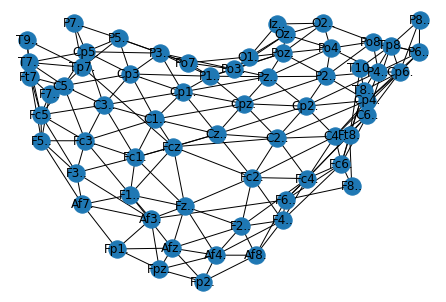

In [39]:
A = n_graph()
    
node_mapping = {i: j for i, j in enumerate(ch_names)}
X_mapping = {i:j for i, j in zip(ch_names, X)} 

NG = nx.convert_matrix.from_numpy_matrix(A)
NG = nx.relabel_nodes(NG, mapping=node_mapping)
nx.set_node_attributes(NG, X_mapping, "value")
nx.draw_spring(NG, with_labels=True)

In [40]:
print(type(A))
print(A)

<class 'numpy.matrix'>
[[0.11111111 0.11111111 0.         ... 0.         0.         0.        ]
 [0.11111111 0.11111111 0.11111111 ... 0.         0.         0.        ]
 [0.         0.11111111 0.11111111 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14285714 0.15430335 0.18898224]
 [0.         0.         0.         ... 0.15430335 0.16666667 0.20412415]
 [0.         0.         0.         ... 0.18898224 0.20412415 0.25      ]]


In [41]:
def graph_info(G):
    print("Nodes:", G.number_of_nodes())
    print("Edges:", G.number_of_edges())
    print("Density:", nx.density(G))

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    dmax = max(degree_sequence)
    dmin = min(degree_sequence)
    daverage = sum(degree_sequence) / len(degree_sequence)
    print("Maximum degree:", dmax)
    print("Minimum degree:", dmin)
    print("Average degree:", daverage)

    print("Degree assortavity:", nx.degree_assortativity_coefficient(G))
    print("Assortativity for node attributes:", nx.attribute_assortativity_coefficient(G, "value"))
    n_triangles = sum(nx.triangles(G).values()) / 3
    print("Number of triangles:", n_triangles)
    print("Average clustering coefficient:", nx.average_clustering(G))

# EEG sensor positions

In [42]:
ten_twenty_montage = mne.channels.make_standard_montage("standard_1020")

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


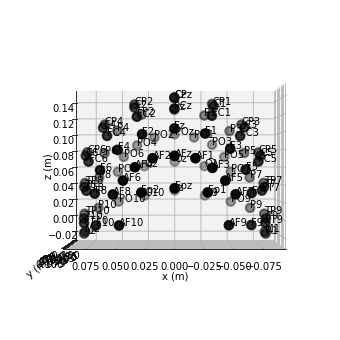

In [43]:
fig = ten_twenty_montage.plot(kind='3d')

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


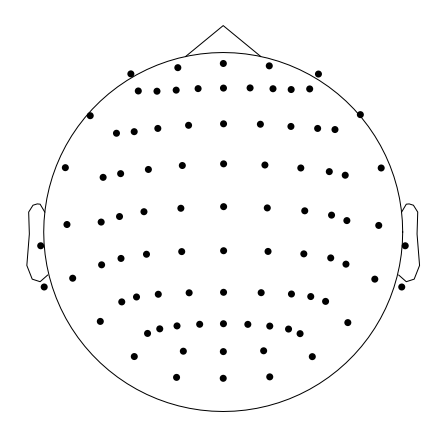

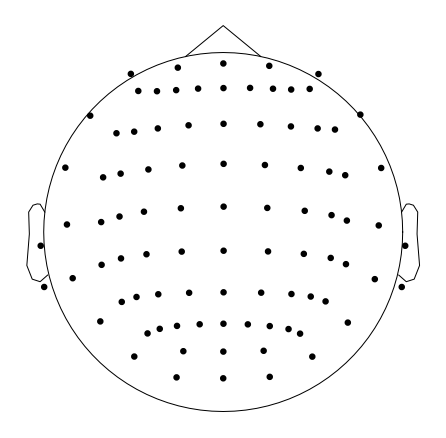

In [44]:
fig.gca().view_init(azim=70, elev=15)
ten_twenty_montage.plot(kind='topomap', show_names=False)

In [45]:
ch_pos_1020 = ten_twenty_montage.get_positions()["ch_pos"]

In [46]:
ch_pos_1010 = {}
for ch_name_orig in ch_names:
    ch_name = ch_name_orig.upper().rstrip(".")
    if "Z" in ch_name:
        ch_name = ch_name.replace("Z", "z")
    if "P" in ch_name and len(ch_name) > 2:
        ch_name = ch_name.replace("P", "p")
    if "Cp" in ch_name:
        ch_name = ch_name.replace("Cp", "CP")
    if "Tp" in ch_name:
        ch_name = ch_name.replace("Tp", "TP")
    if "pO" in ch_name:
        ch_name = ch_name.replace("pO", "PO")
    ch_pos_1010[ch_name_orig] = ch_pos_1020[ch_name]
print(len(ch_pos_1010))

64


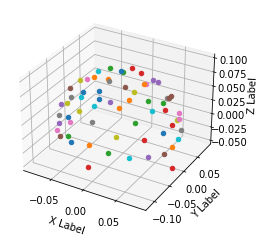

In [47]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for key, value in ch_pos_1010.items():
    ax.scatter(value[0], value[1], value[2], label=key)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

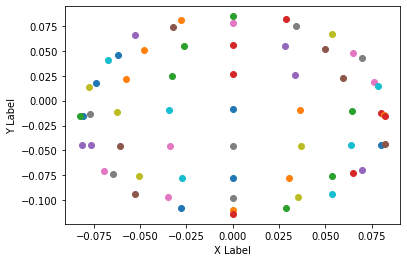

In [48]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot()

for key, value in ch_pos_1010.items():
    ax.scatter(value[0], value[1], label=key)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

In [49]:
ch_pos_1010["Fc5."]

array([-0.07400814,  0.01786904,  0.02344417])

In [50]:
ch_pos_1010_names = []
ch_pos_1010_dist = []
for name, value in ch_pos_1010.items():
    ch_pos_1010_names.append(name)
    ch_pos_1010_dist.append(value)
ch_pos_1010_dist = np.array(ch_pos_1010_dist)

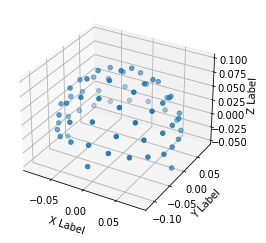

In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(ch_pos_1010_dist[:, 0], ch_pos_1010_dist[:, 1], ch_pos_1010_dist[:, 2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# D-Graph

In [52]:
def d_graph(num_node, loc):
    A = np.zeros([num_node, num_node])
    x = loc[:, 0]
    y = loc[:, 1]
    z = loc[:, 2]
    for m in range(num_node):
        for n in range(num_node):
            if m != n:
                A[m, n] = np.power(
                    np.power((x[m] - x[n]), 2) + np.power((y[m] - y[n]), 2) + np.power((z[m] - z[n]), 2), -0.5)
    x_loc = np.expand_dims(np.where(A<np.mean(A))[0], axis=1)
    y_loc = np.expand_dims(np.where(A<np.mean(A))[1], axis=1)
    loc = np.append(x_loc,y_loc, axis=1)
    for i,j in loc:
        A[i, j] = 0
    for k in range(num_node):
        A[k,k]=np.mean(A[k])
    adj = normalize_adj(A)
    return adj

In [53]:
A = d_graph(64, ch_pos_1010_dist)
node_mapping = {i: j for i, j in enumerate(ch_names)}
X_mapping = {i:j for i, j in zip(ch_names, X)} 

DG = nx.convert_matrix.from_numpy_matrix(A)
DG = nx.relabel_nodes(DG, mapping=node_mapping)
nx.set_node_attributes(DG, X_mapping, "value")

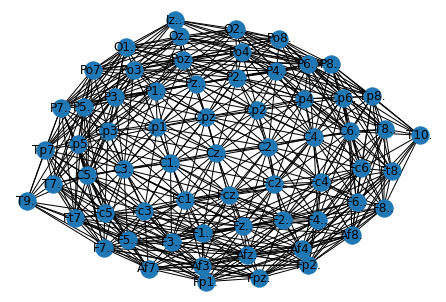

In [54]:
nx.draw_spring(DG, with_labels=True)

# S-Graph

In [55]:
def s_graph(num_node, loc):
    A = np.zeros([num_node, num_node])
    x = loc[:, 0]
    y = loc[:, 1]
    z = loc[:, 2]
    for m in range(num_node):
        for n in range(num_node):
            if m != n:
                A[m, n] = np.power(
                    np.power((x[m] - x[n]), 2) + np.power((y[m] - y[n]), 2) + np.power((z[m] - z[n]), 2), -0.5)
    x_loc = np.expand_dims(np.where(A<np.mean(A))[0], axis=1)
    y_loc = np.expand_dims(np.where(A<np.mean(A))[1], axis=1)
    loc = np.append(x_loc,y_loc, axis=1)
    for i,j in loc:
        A[i, j] = 0
    for k in range(num_node):
        A[k,k]=min(A[k])
    adj = normalize_adj(A)

    return adj

In [56]:
A = s_graph(64, ch_pos_1010_dist)
node_mapping = {i: j for i, j in enumerate(ch_names)}
X_mapping = {i:j for i, j in zip(ch_names, X)} 

SG = nx.convert_matrix.from_numpy_matrix(A)
SG = nx.relabel_nodes(SG, mapping=node_mapping)
nx.set_node_attributes(SG, X_mapping, "value")

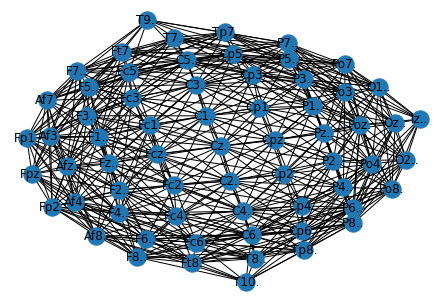

In [57]:
nx.draw_spring(SG, with_labels=True)

In [58]:
print("N-Graph:")
graph_info(NG)
print("")
print("D-Graph:")
graph_info(DG)
print("")
print("S-Graph:")
graph_info(SG)

N-Graph:
Nodes: 64
Edges: 272
Density: 0.1349206349206349
Maximum degree: 10
Minimum degree: 5
Average degree: 8.5
Degree assortavity: 0.4670614359733529
Assortativity for node attributes: 0.12473743016759775
Number of triangles: 180.0
Average clustering coefficient: 0.48768601190476174

D-Graph:
Nodes: 64
Edges: 707
Density: 0.3506944444444444
Maximum degree: 28
Minimum degree: 13
Average degree: 22.09375
Degree assortavity: 0.22786571106876571
Assortativity for node attributes: 0.03627086978474232
Number of triangles: 2634.0
Average clustering coefficient: 0.6444322277879536

S-Graph:
Nodes: 64
Edges: 643
Density: 0.3189484126984127
Maximum degree: 26
Minimum degree: 11
Average degree: 20.09375
Degree assortavity: 0.18288625393827293
Assortativity for node attributes: -0.011772760940874776
Number of triangles: 2634.0
Average clustering coefficient: 0.6444322277879536
